In this notebook the PCA-based splits were conducted.

In [2]:
import sys
sys.path.append('..')
from src import *

C:\Users\mlovric\Anaconda3\envs\envphd\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\mlovric\Anaconda3\envs\envphd\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [97]:
from src.utils import load_data

In [98]:
df_log, df_fp, df_desc, df_all, predictive_dataset = load_data()

In [99]:
df_log

,logS0,random,diversity
smiles,,,
C(\C=C\c1ccccc1)N1CCN(CC1)C(c1ccccc1)c1ccccc1,-5.3400,0,1
C(c1ccccc1)n1ccnc1,-2.2600,0,1
C1Cc2ccccc2N1,-1.0400,0,1
C1O[C@H]1c1ccccc1,-1.6000,1,2
C=CCC1(C(=O)NC(=O)NC1=O)c1ccccc1,-2.3460,0,1
...,...,...,...
c1cnc2c(c1)ccc1cccnc21,-1.6180,1,2
c1cnc2ncncc2n1,0.0205,0,1
c1nc(cs1)-c1nc2ccccc2[nH]1,-3.4840,1,2


In [100]:
from sklearn.decomposition import PCA

In [101]:
def low_var_rem(ds, threshold=0.05):
    """

    :param ds:
    :return:
    """
    from sklearn.feature_selection import VarianceThreshold
    feature_selection = VarianceThreshold(threshold=threshold)
    feature_selection.fit(ds)
    cols = ds.columns[feature_selection.get_support()]
    ds_clean = pd.DataFrame(feature_selection.transform(ds), columns=cols, index=ds.index)

    print(len(ds.columns)-len(ds_clean.columns), ' fingeprint removed')
    return ds_clean
df_fp = low_var_rem(df_fp)
df_fp.shape

5043  fingeprint removed


(829, 77)

In [102]:
pca_ = PCA(n_components=3).fit(df_fp)
pca_array = pca_.transform(df_fp)
pca_dataframe = pd.DataFrame(pca_array, index=df_fp.index, columns = ['pc1','pc2', 'pc3'])
pca_dataframe.head()

,pc1,pc2,pc3
smiles,,,
C(c1ccccc1)n1ccnc1,-1.338901,-0.592998,-1.222384
C=CCC1(C(=O)NC(=O)NC1=O)c1ccccc1,-0.957136,-0.831307,-0.097999
C=CCC1(CC=C)C(=O)NC(=O)NC1=O,0.763235,-1.210811,0.610111
CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[C@H](C[C@]12C)c1ccc(cc1)N(C)C,-0.477117,-0.819209,1.753972
CC(=O)CCCCn1c(=O)n(C)c2ncn(C)c2c1=O,0.177802,0.390599,0.668723


In [103]:
np.cumsum(pca_.explained_variance_ratio_)*100

array([11.90508441, 20.6621002 , 28.35887256])

In [133]:
def centeroidnp(arr):
    arr = np.array(arr)
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    sum_z = np.sum(arr[:, 2])
    return [sum_x/length, sum_y/length, sum_z/length]
def distance_centroid(x, y):
    from scipy.spatial.distance import euclidean
    return euclidean(x, y)

centroid_pca= centeroidnp(pca_array)

In [134]:
centroid_pca[0]

-1.371373193264367e-16

In [135]:
distance_matrix = pca_dataframe.apply(lambda x: distance_centroid(x, centroid_pca), axis=1)
q80 = distance_matrix.quantile(.799)
indices_lesst_q80 = distance_matrix[distance_matrix<q80].index
indices_aboveq80 = list(set(distance_matrix.index).symmetric_difference(set(indices_lesst_q80)))

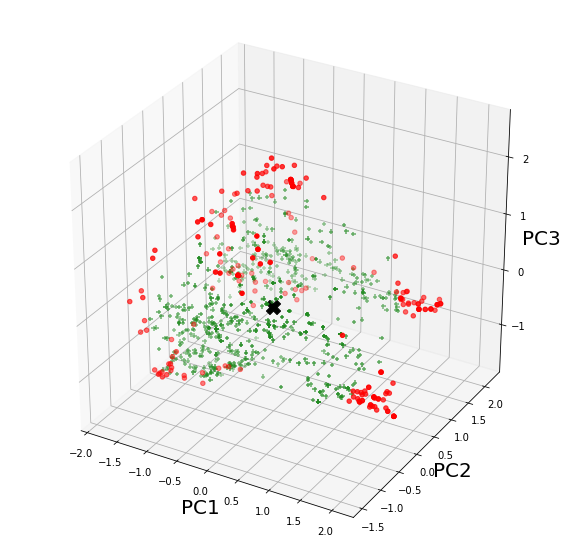

In [136]:
# Create the figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = pca_dataframe.pc1.loc[indices_lesst_q75]
y_vals = pca_dataframe.pc2.loc[indices_lesst_q75]
z_vals = pca_dataframe.pc3.loc[indices_lesst_q75]

x_ab = pca_dataframe.pc1.loc[indices_aboveq75]
y_ab = pca_dataframe.pc2.loc[indices_aboveq75]
z_ab = pca_dataframe.pc3.loc[indices_aboveq75]

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'forestgreen', marker='+')
ax.scatter(x_ab, y_ab, z_ab, c = 'red', marker='o')
ax.scatter(centroid_pca[0],centroid_pca[1], centroid_pca[2], s=200, marker='X', color='black')
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)



plt.show()

In [146]:
df_log['pca_split'] = df_log.index.to_series().apply(lambda x: 1 if x in indices_aboveq80 else 0)

In [147]:
df_log.pca_split.value_counts()

0    662
1    167
Name: pca_split, dtype: int64

In [148]:
167/(208+621)

0.2014475271411339

In [149]:
df_log.to_csv('../data/solubility_data.csv')